##Goal:  Using K-means to identify unique types of Iris.
<p style="color:blue">
Import pandas, numpy, Sci Toolkit (sklearn) and libraries for fetching data and implementing K-means model
</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
%matplotlib inline

<p style="color:blue">
Import the Iris dataset and tranfer it into a dataframe. 
</p>

In [2]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names

<p style="color:blue">
Let us peek at few records in the dataframe
</p>

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<p style="color:blue">
Scale the features of the dataframe
</p>

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<p style="color:blue">
Define function to plot mean distortion over a range of values for number of clusters 'k'
</p>

In [5]:
#Function copied from KMeans lecture by Professor Michael Bernico
def find_k (X, k_range, sample_percent=1):
   
    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        #To avoid error in multi-threaded mode, running with n_jobs as 1
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()
    return

<p style="color:blue">
Invoke the find_k function over a range of 1 to 10 cluster count
</p>

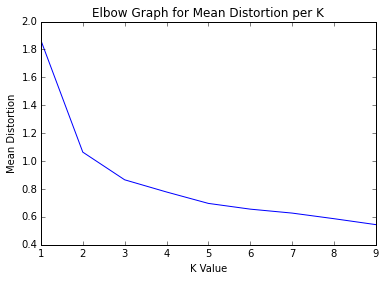

In [6]:
find_k(np.matrix(df), range(1,10),1)

<p style="color:red">
From the above elbow graph, we will pick 3 as a good value for number of clusters.
</p>

<p style="color:blue">
Fit the scaled dataframe to a KMeans model with cluster count of 3
</p>

In [7]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=42, tol=0.0001,
    verbose=0)

<p style="color:blue">
Add KMeans cluster labels to the dataframe
</p>

In [8]:
df['labels'] = kmeans_model.labels_

<p style="color:blue">
Let us look at records in the dataframe with their corresponding cluster labels
</p>

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1
5,-0.537178,1.957669,-1.170675,-1.050031,1
6,-1.506521,0.800654,-1.341272,-1.181504,1
7,-1.021849,0.800654,-1.284407,-1.312977,1
8,-1.748856,-0.356361,-1.341272,-1.312977,1
9,-1.143017,0.106445,-1.284407,-1.444450,1


<p style="color:blue">
Let us use TSNE to visually inspect the clusters
</p>

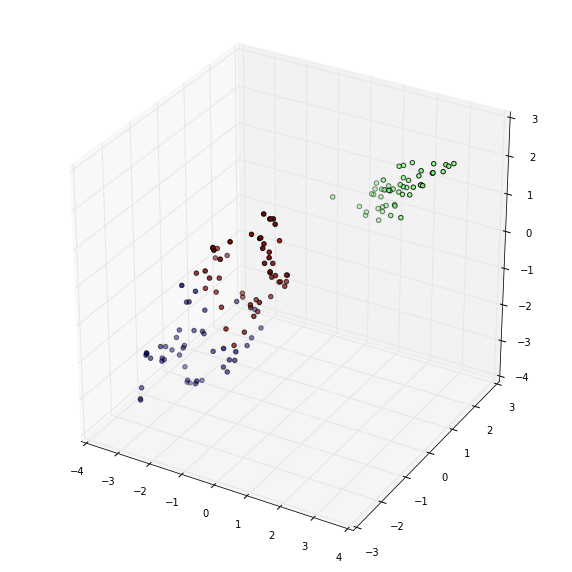

In [10]:
model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)